# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Data Analysis

In [2]:
data = pd.read_csv('Housing.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
data.shape

(545, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
# Find empty data cells
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
data['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

# Visualization

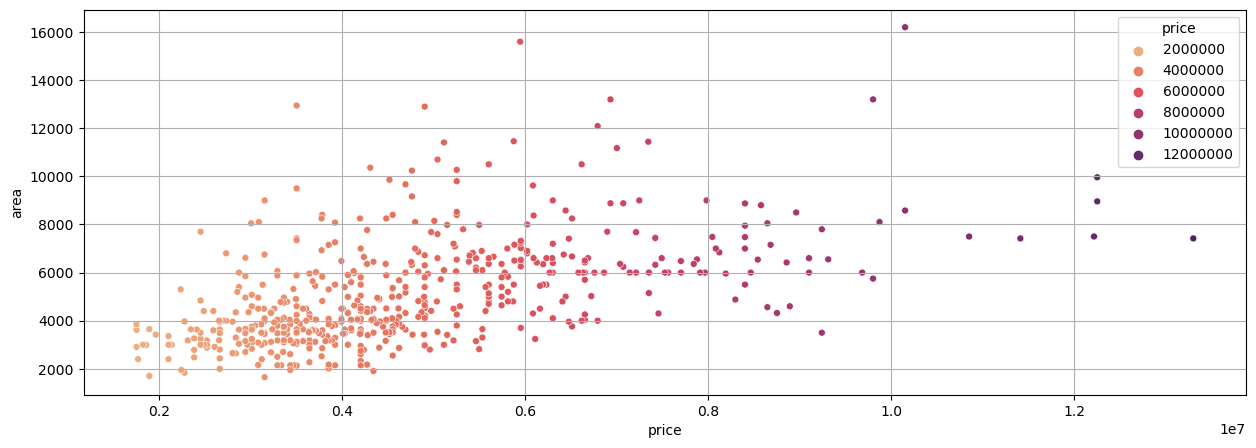

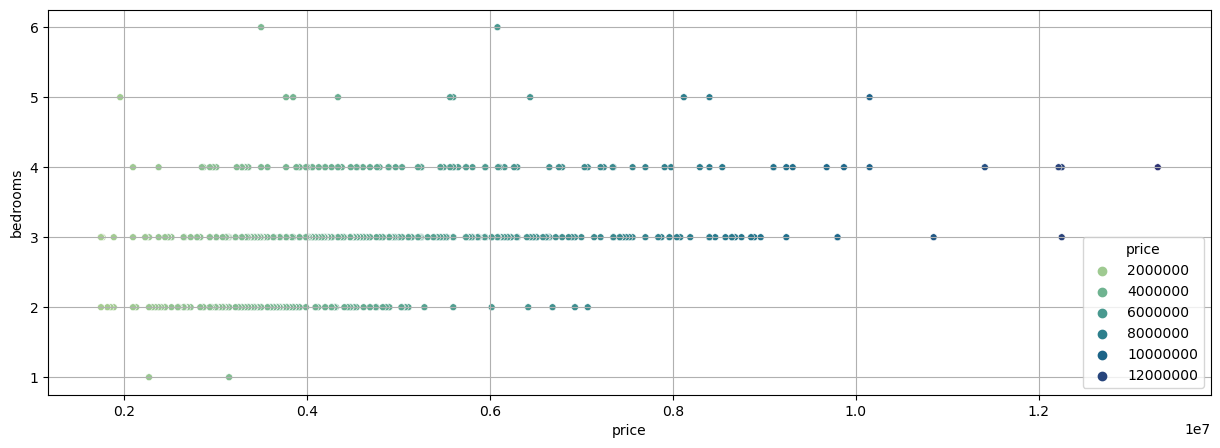

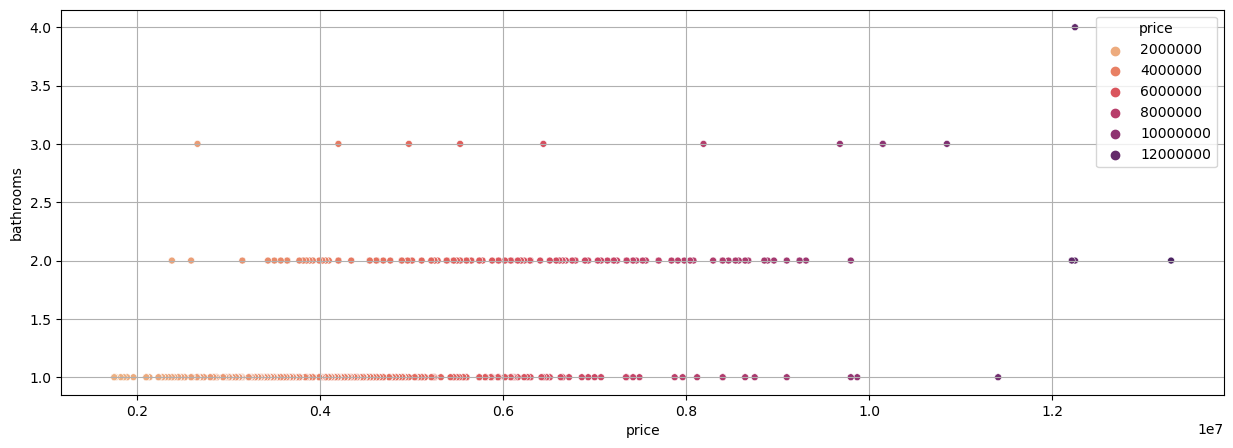

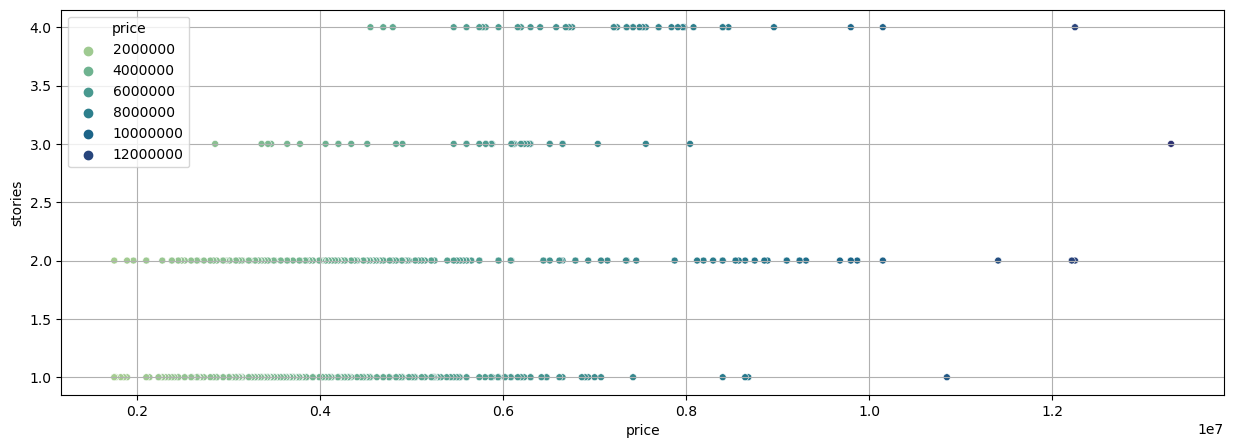

In [8]:
plt.figure(figsize = (15,5))
sns.scatterplot(x = 'price', y = 'area', data = data, hue = 'price', palette = 'flare', s = 25)
plt.grid()

plt.figure(figsize = (15,5))
sns.scatterplot(x = 'price', y = 'bedrooms', data = data, hue = 'price', palette = 'crest', s = 25)
plt.grid()

plt.figure(figsize = (15,5))
sns.scatterplot(x = 'price', y = 'bathrooms', data = data, hue = 'price', palette = 'flare', s = 25)
plt.grid()

plt.figure(figsize = (15,5))
sns.scatterplot(x = 'price', y = 'stories', data = data, hue = 'price', palette = 'crest', s = 25)
plt.grid()

<Axes: xlabel='bedrooms', ylabel='count'>

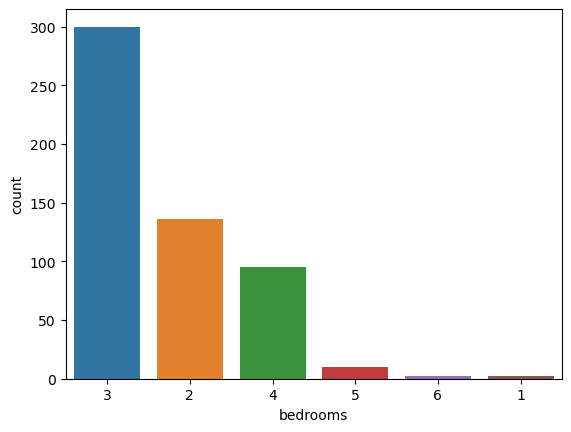

In [9]:
sns.countplot(data=data, x='bedrooms', order=data['bedrooms'].value_counts().index)

<Axes: xlabel='bathrooms', ylabel='count'>

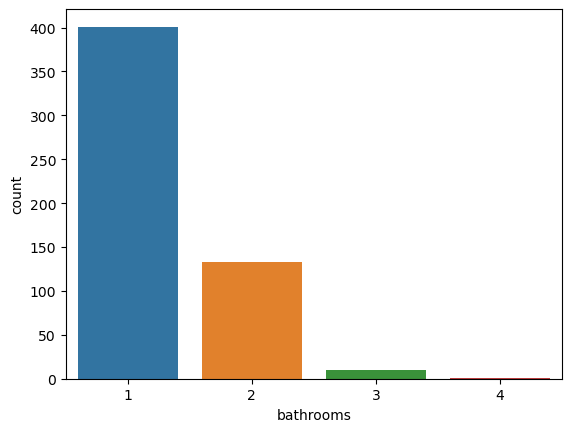

In [10]:
sns.countplot(data=data, x='bathrooms', order=data['bathrooms'].value_counts().index)

<Axes: xlabel='stories', ylabel='count'>

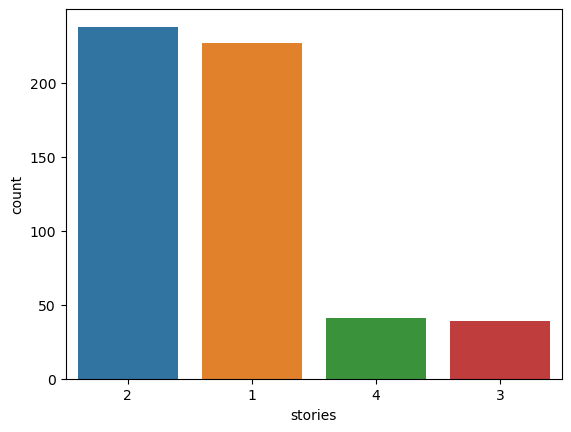

In [11]:
sns.countplot(data=data, x='stories', order=data['stories'].value_counts().index)

<Axes: xlabel='furnishingstatus', ylabel='count'>

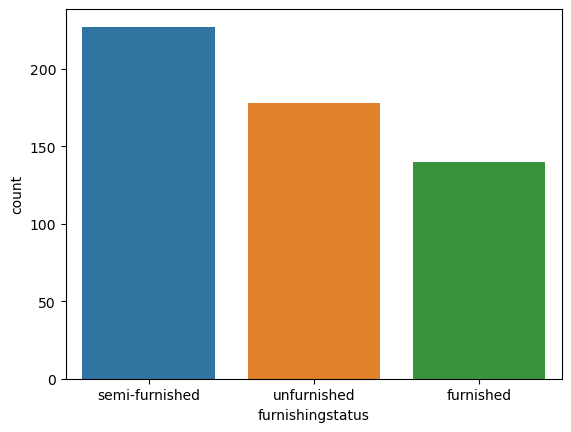

In [12]:
sns.countplot(data=data, x='furnishingstatus', order=data['furnishingstatus'].value_counts().index)

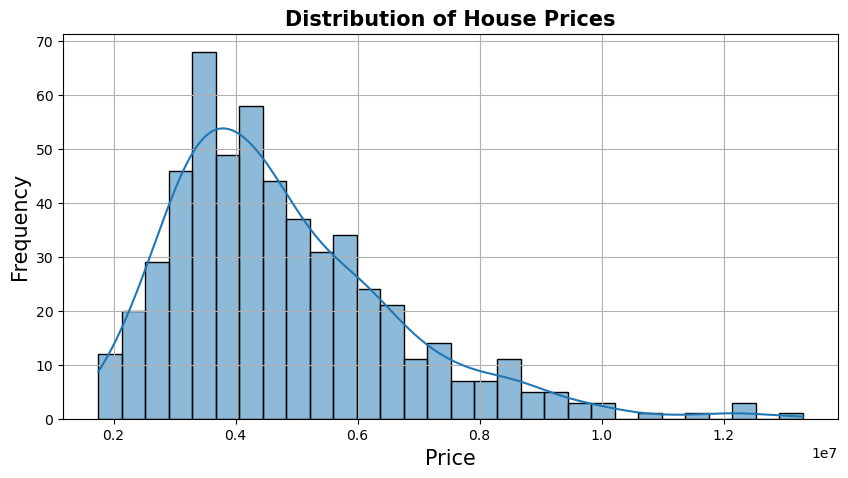

In [13]:
plt.figure(figsize=(10, 5))
sns.histplot(data['price'], bins=30, kde=True,  edgecolor='black')
plt.title('Distribution of House Prices', fontsize=15, weight='bold')
plt.xlabel('Price', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid()
plt.show()

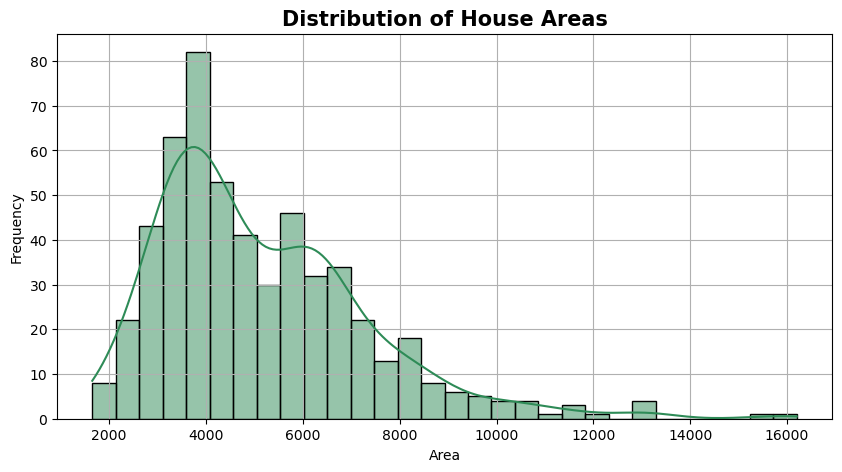

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot(data['area'], bins=30, kde=True, color = "seagreen", edgecolor='black')
plt.title('Distribution of House Areas', fontsize=15, weight='bold')
plt.xlabel('Area', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid()
plt.show()

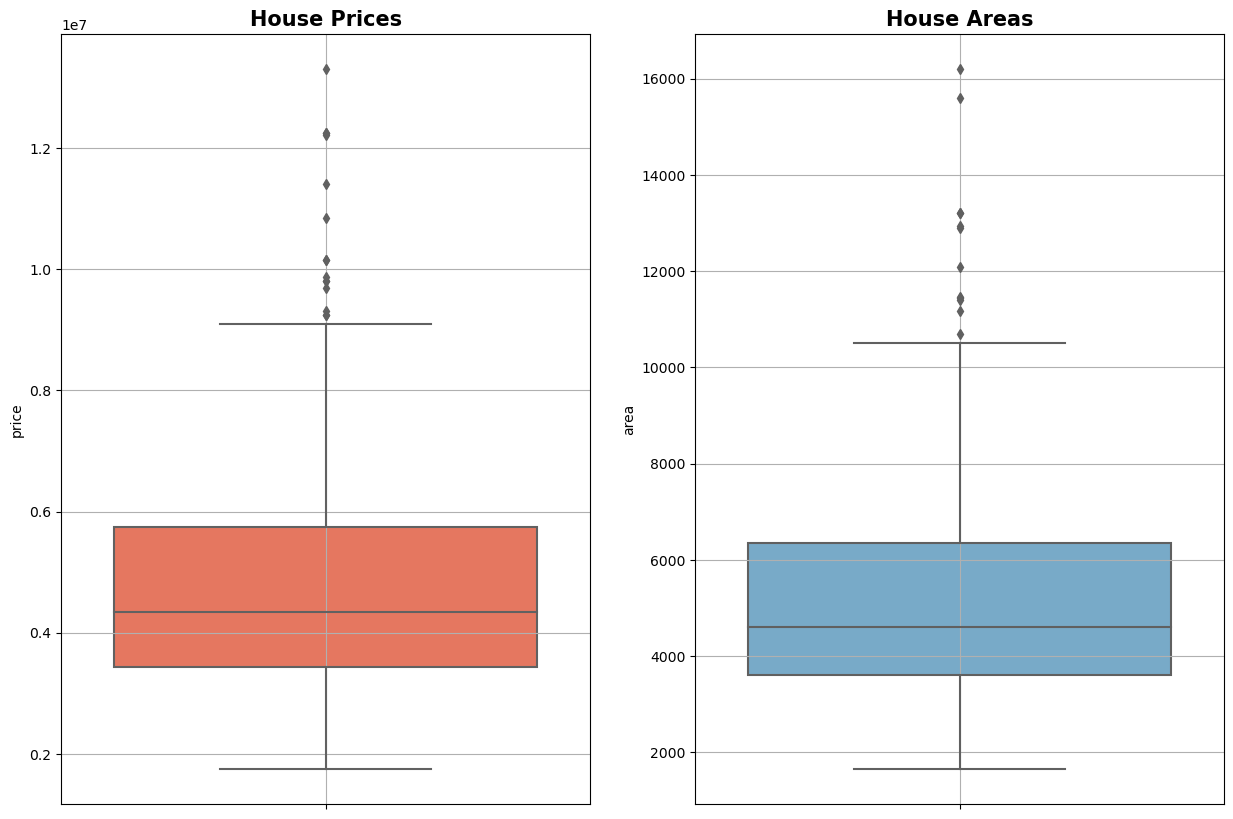

In [15]:
fig, axs = plt.subplots(ncols=2, sharey=False, figsize=(15, 10))

sns.boxplot(y = data['price'], palette = 'Reds', ax = axs[0])
axs[0].set_title('House Prices',  fontsize=15, weight = "bold")
axs[0].grid()

sns.boxplot(y = data['area'], palette = 'Blues', ax = axs[1])
axs[1].set_title('House Areas',  fontsize=15, weight = "bold")
axs[1].grid()

# Datasets Pre-Processing

In [16]:
# Replace yes and no in data coulumns into 1 and 0
data[['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']] = data[['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']].replace({'yes': 1, 'no': 0}).astype(int)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [17]:
encoder = LabelEncoder()
data['furnishingstatus'] = encoder.fit_transform(data['furnishingstatus'])
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [18]:
X = data.loc[:, data.columns != 'price']
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0


In [19]:
y = data['price']
y.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

## Scale Features

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.046726,1.403419,1.421812,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,1.804941,-1.406286
1,1.757010,1.403419,5.405809,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2.679409,-0.554035,-1.406286
2,2.218232,0.047278,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,1.804941,-0.091662
3,1.083624,1.403419,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,1.804941,-1.406286
4,1.046726,1.403419,-0.570187,0.224410,0.405623,2.149083,1.361397,-0.219265,1.472618,1.517692,-0.554035,-1.406286
...,...,...,...,...,...,...,...,...,...,...,...,...
540,-0.991879,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,-0.554035,1.222962
541,-1.268613,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,-0.091662
542,-0.705921,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,1.222962
543,-1.033389,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,-1.406286


## Split Dataset

**Divide training dataset into feature inputs and target outputs**

To evaluate our model, we will divide the training dataset into 80% training batch to train the model and validation batch to evaluate the model. Then we will use the model to predict the output pressure from test dataset.

In [21]:
from sklearn.model_selection import train_test_split

# Dataset is divided into 80% for training and 20% for validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 42)

# Shape of datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((436, 12), (109, 12), (436,), (109,))

# Build The Model

In [22]:
# TO evaluate and compare between the models, we import metrics library from sklearn
def performance(model, X_train, y_train, y_pred, y_test):
    print('Mean Squared Error:', mean_squared_error(y_test,y_pred))
    print('Mean Absolute Error:', mean_absolute_error(y_test,y_pred))
    print('Training Score:', model.score(X_train,y_train))
    print('Testing Score:', r2_score(y_test,y_pred))

## 1. Linear Regression

In [23]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)
performance(lr, X_train, y_train, lr_pred, y_test)

Mean Squared Error: 1771751116594.0396
Mean Absolute Error: 979679.6912959906
Training Score: 0.6854429472843788
Testing Score: 0.6494754192267795


## 2. Decision Tree Regressor

In [24]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
dtr_pred = dtr.predict(X_test)
performance(dtr, X_train, y_train, dtr_pred, y_test)

Mean Squared Error: 2783542662844.0366
Mean Absolute Error: 1201720.1834862386
Training Score: 0.9985402884288594
Testing Score: 0.449301814561045


## 3. Random Forest Regressor

In [25]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train.values.ravel())
rfr_pred = rfr.predict(X_test)
performance(rfr, X_train, y_train, rfr_pred, y_test)

Mean Squared Error: 1936536043797.989
Mean Absolute Error: 1015477.1730886849
Training Score: 0.947859176441526
Testing Score: 0.616874244612058


## 4. XGB Regressor

In [26]:
xgbr = XGBRegressor()
xgbr.fit(X_train,y_train)
xgbr_pred = xgbr.predict(X_test)
performance(xgbr, X_train, y_train, xgbr_pred, y_test)

Mean Squared Error: 2032404618961.4353
Mean Absolute Error: 1062315.9931192661
Training Score: 0.9974079060603043
Testing Score: 0.5979075332022226


# Regression Plot

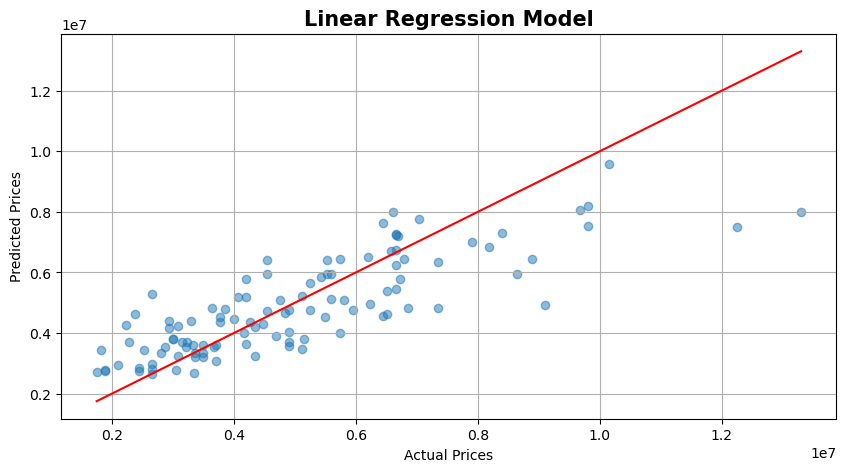

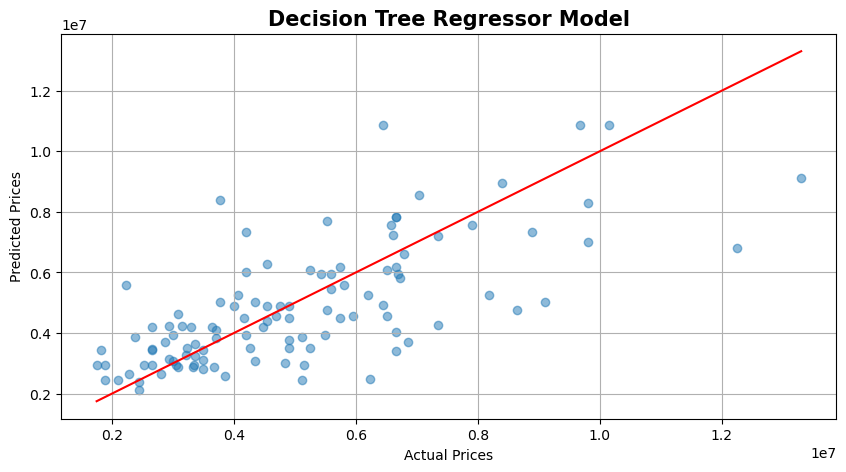

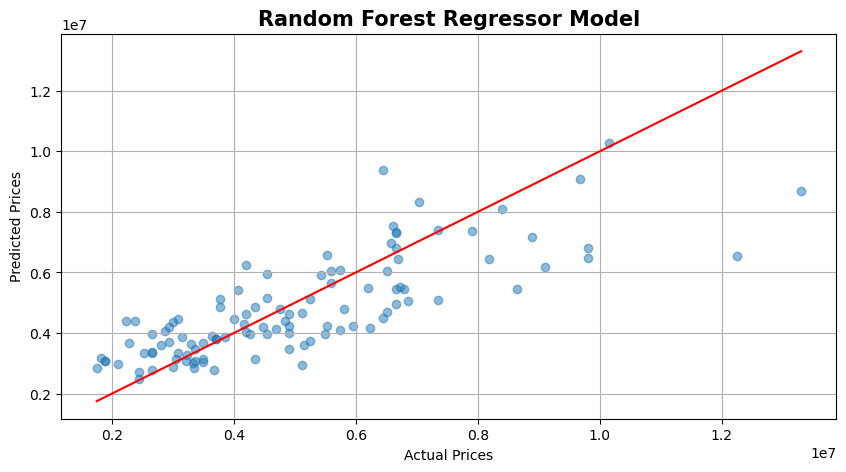

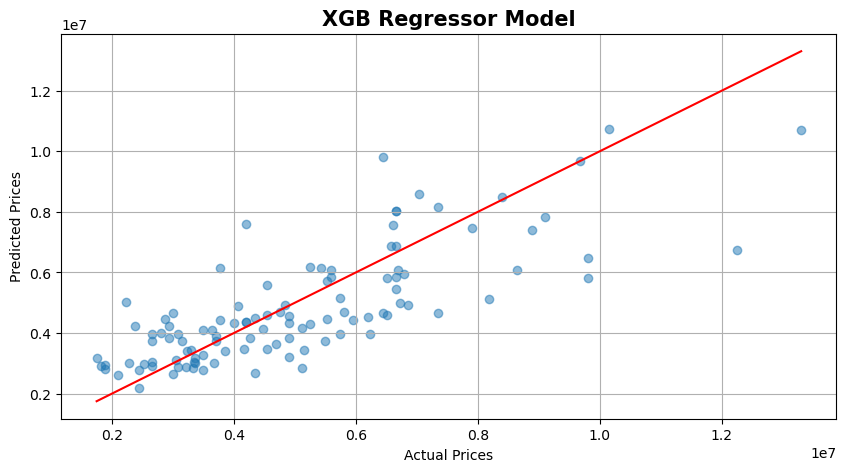

In [27]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, lr_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')
plt.title('Linear Regression Model', fontsize = "15", weight = "bold")
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid()

plt.figure(figsize=(10, 5))
plt.scatter(y_test, dtr_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')
plt.title('Decision Tree Regressor Model', fontsize = "15", weight = "bold")
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid()

plt.figure(figsize=(10, 5))
plt.scatter(y_test, rfr_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')
plt.title('Random Forest Regressor Model', fontsize = "15", weight = "bold")
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid()

plt.figure(figsize=(10, 5))
plt.scatter(y_test, xgbr_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')
plt.title('XGB Regressor Model', fontsize = "15", weight = "bold")
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid()